Цели проекта: 
1. Приоритизировать гипотизы по методам ICE и RICE.
2. Проанализировать результаты A/B теста и сделать выводы относительно проведенного эксперемента.

Импортируем необходимые для работы библиотеки.

In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from scipy import stats as st
pd.options.display.float_format ='{:,.2f}'.format
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
pd.set_option('display.max_colwidth', 200)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Часть 1. Приоритизация гипотез.

Загрузим файл и посмотрим на структуру таблицы.

In [ ]:
data_hyp = pd.read_csv('/datasets/hypothesis.csv')
data_hyp.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [ ]:
data_hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


* Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [ ]:
data_hyp['ice'] = data_hyp['Impact'] * data_hyp['Confidence'] / data_hyp['Efforts']
data_hyp.sort_values('ice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Как видно из таблицы главной задачей по фреймворку ICE является "запустить акцию, дающую скидку на товар в день рождения"

Теперь посмотрим как отличаются результаты, если приоритизировать по методу RICE.

In [ ]:
data_hyp['rice'] = data_hyp['Reach'] * data_hyp['Impact'] * data_hyp['Confidence'] / data_hyp['Efforts']
data_hyp.sort_values('rice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


Результаты отличаются. Оно и понятно в формулу добавляется новая переменная Reach, которая отвечает за оценку охватата пользователей, которых затронет изменение. 

# Часть 2. Анализ A/B теста.

Прочитаем данные для анализа и запишем их в соответствующие переменные. А также посмотрим на структуру таблицы и типы данных. 

In [ ]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
orders = orders.rename(columns={'transactionId': 'orderId', 'visitorId': 'userId'})
orders.head()

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
 orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
orderId    1197 non-null int64
userId     1197 non-null int64
date       1197 non-null object
revenue    1197 non-null int64
group      1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Изменим тип данных у столбца с датой заказа на datetime

In [ ]:
orders['date'] = pd.to_datetime(orders['date'])

Проделаем тоже самое для второго набора данных с данными по визитам.

In [ ]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим на дубликаты.

In [ ]:
visitors.duplicated().sum()

0

In [ ]:
orders.duplicated().sum()

0

* <strong> Построим график кумулятивной выручки по группам.</strong>

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Сравним графики для группы А и B по кумулятивной выручке.

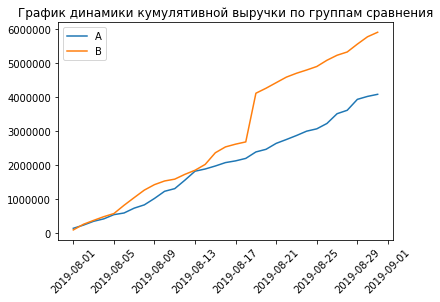

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График динамики кумулятивной выручки по группам сравнения')
plt.xticks(rotation=45)

plt.legend() 

Выручка растет в течении всего времени теста. Также видим, что в определенный день выручка группы B стала резко возрастать, что наводит на мысль о том, что в наборе данных есть выбросы - заказы с аномально высоким чеком, которые искажают общую картину. Мы это проверим. Сейчас посмотрим как изменялся средний чек в течении теста.

* <strong> Построим график кумулятивного среднего чека по группам. </strong>

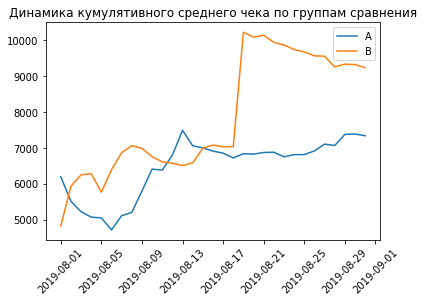

In [ ]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.title('Динамика кумулятивного среднего чека по группам сравнения')
plt.legend()

Здесь видим похожую картину: резкое возрастание среднего чека в группе B около даты 2019-08-17. Теперь это явно указывает на то, что в наборе данных группы B присутствут выбросы аномально высоких по стоимости заказов. Средний чек группы А к концу теста стабилизировался, в то время как для группы B необходимы еще данные, чтобы выровнять средний чек к реальному. 

* <strong> Построим график относительного изменения кумулятивного среднего чека группы B к группе A. </strong>

Text(0.5, 1.0, 'График относительного изменения среднего чека группы B от группы А')

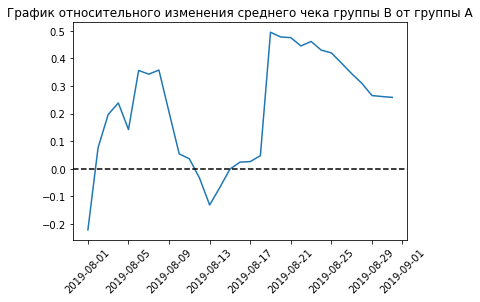

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('График относительного изменения среднего чека группы B от группы А')

Резкие всплекски опять же подтверждают наличие выбросов и аномалий в данных. По сырым данным группа B лучше по выручке и среднему чеку. Посмотрим как изменяться выводы в фильтрованных данных.

* <strong>Построим график кумулятивной конверсии по группам.

['2019-08-01', '2019-08-29', 0, 0.05]

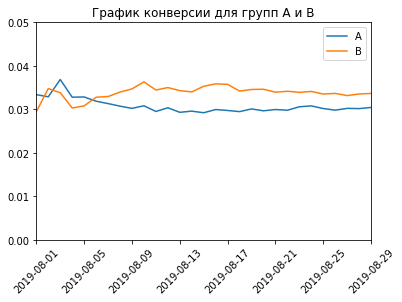

In [ ]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend()
plt.title('График конверсии для групп A и B')

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-29', 0, 0.05])

Высокие колебания конверсии вначале были выше у группы A. Однако потом они симметрично разошлись, группа А вниз, а группа B вверх и так до окончания теста конверсия группы B оказалась выше.

* <strong>Построим график относительного изменения кумулятивной конверсии группы B к группе A.

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300.]),
 <a list of 8 Text xticklabel objects>)

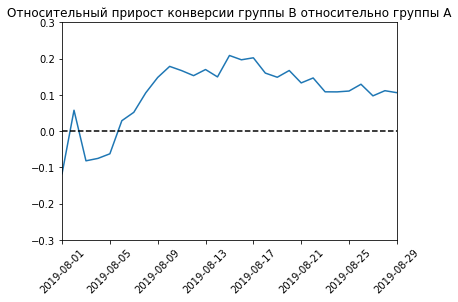

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
#plt.legend()
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
#plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-29', -0.3, 0.3])
plt.xticks(rotation=45)

Вначале группа A показывала выше конверсию, но потом где-то с 2019-08-06 группа B показывала значительный прирост в конверсии, хотя и имеет тренд на снижение, начиная с 2019-08-17. Возможно требуются еще данные, чтобы стабилизировать показания и выйти на реальный показатель.

* <strong> Построим точечный график количества заказов по пользователям.

In [ ]:
orders.head()

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
amount_orders = orders.groupby('userId').agg({'orderId': 'count'}).rename(columns={'orderId': 'amount_orders'})
x_values = pd.Series(range(len(amount_orders['amount_orders'])))

Text(0.5, 1.0, 'Количество заказов на одного пользователя')

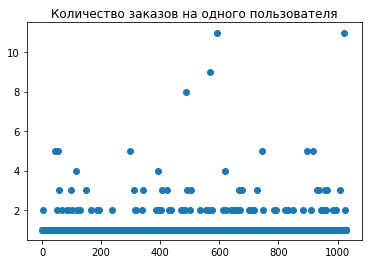

In [ ]:
plt.scatter(x_values, amount_orders['amount_orders'])
plt.title('Количество заказов на одного пользователя')

График показывает, что большая часть пользователей ограничиваются одним заказом, 2 заказа тоже бывает довольно часто, 3 и выше уже довольно редко. Посмотрим на количественную оценку.

* <strong> Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Определим границу для аномальных пользователей.

In [ ]:
print(np.percentile(amount_orders['amount_orders'], [90, 95, 99]))

[1. 2. 4.]


5 % пользователей заказывают больше 2-х раз. Возьмем границу в 3 заказа. Все что выше будем считать за аномалию.

* <strong> Построим точечный график стоимостей заказов.

Text(0.5, 1.0, 'Сумма заказов на одного пользователя')

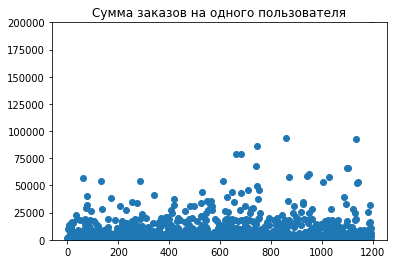

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 200000)
plt.title('Сумма заказов на одного пользователя')

Видим, что большая часть заказов со стоимостью не превышающей 25 000. Посмотрим на количественную оценку.

* <strong> Посчитаем 95-й и 99-й перцентили стоимости заказов. Определим границу для определения аномальных заказов.

In [ ]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Возьмем границу отсечения в 28 000. Все что выше будем считать выбросами.

* <strong> Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Зададим статистическую значимость в 0.05 и сравним группы. Сначала сгруппируем данные по заказам и создадим переменные, содержащие кумулятивную информацию по соответствующей дате.

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Сформулируем нулевую и альтернативную гипотезы:
<p>H0: конверсия группы A равна конверсии группы B</p>
<p>H1: конверсия группы A не равна конверсии группы B</p>

In [ ]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
# уровень статистической значимости
alpha = 0.05

print('p_value: ' + "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост конверсии группы B относительно группы A: ' + "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

if st.mannwhitneyu(sampleA, sampleB)[1] < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p_value: 0.008
Относительный прирост конверсии группы B относительно группы A: 0.138
Отвергаем нулевую гипотезу: разница статистически значима


Видим, что по "сырым" данным конверсии двух групп различаются, причем прирост по конверсии составил почти 14 %.

* <strong> Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [ ]:
print('p_value: ' + '{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем чеке: ' + '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p_value: 0.365
Относительное различие в среднем чеке: 0.259


Разницы в среднем чеке между группами нет. А вот относительный прирост показывает, что в группе B средний чек выше. Это как раз влияние выбросов. Далее посмотрим на очищеннные данные и их статистические показатели и как они отличаются от "сырых".

* <strong> Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

Ранее мы определили границу для фильтрации дла количества заказов и сумме заказа: кол-во заказов от 3-х и сумма заказа от 28 000

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: userId, dtype: int64
(63,)


63 пользователя с аномальными данными. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [ ]:
print('p_value: ' + '{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы B относительно группы A по очищеным данным: ' + '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
if st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значема')
else:
    print('Не отвергаем нулевую гипотезу')

p_value: 0.009
Относительный прирост конверсии группы B относительно группы A по очищеным данным: 0.148
Отвергаем нулевую гипотезу: разница статистически значема


Напомним, что нулевая гипотеза о равенстве конверсий групп A и B. Все таки различия существенны и группа B действительно лучше покупает, чем группа A. Весомый аргумент для того, чтобы признать эксперимент успешным. Теперь посмотрим на различия в среднем чеке.

* <strong> Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [ ]:
print('p_value: ' + 
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост конверсии группы B относительно группы A по очищеным данным: ' + 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p_value: 0.488
Относительный прирост конверсии группы B относительно группы A по очищеным данным: -0.017


Теперь все сходится и прирост в среднем чеке отсутствует, так как мы убрали аномальные данные. Разницы в среднем чеке между группами нет.

# Выводы

Исходя из проведенного анализа можно сделать следующие выводы:

1. Разница в конверсии между группами существенна и статистически значема, что позволяет утверждать, что изменения в продукте повлияли на пользователей в группе B в позитивную сторону и это главный аргумент, чтобы реализовать эти изменения уже на основном продукте.
2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
3. График различия конверсии между группами сообщает, что результаты группы B лучше группы A и данные стабилизаровались, что сигнализирует о том, что тест можно прекращать.

Результаты эксперимента можно признать успешными и вносить изменения в основной продукт. 